In [34]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
import matplotlib.pyplot as plt
import time
import math
import numpy as np

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://down2earth.eu/impact_calculator/planet.html?lang=en-US")
move = ActionChains(driver)
pds = []
depths = []
dias = []

search_box = driver.find_element(By.XPATH, '//*[@id="Earth"]/img')
search_box.click()
search_box = driver.find_element(By.XPATH, '//*[@id="StartButton"]')
search_box.click()
en2 = driver.find_element(By.XPATH, '//*[@id="ProjectileVelocitySlider"]')
move.click_and_hold(en2).move_by_offset(-1, 0).release().perform()

for i in range(10):
    en =  driver.find_element(By.XPATH, '//*[@id="ProjectileSizeSlider"]')
    move.click_and_hold(en).move_by_offset(2, 0).release().perform()
    pd = driver.find_element(By.XPATH, '//*[@id="ProjectileValue"]')
    pds.append(pd.text[0:4])
    print(f"Projectile dia: {pd.text[0:4]}")
    time.sleep(1)
    clect = driver.find_element(By.XPATH, '//*[@id="cpPjDens"]')
    clect.click()
    clect2 = driver.find_element(By.XPATH, '//*[@id="pjd_op3"]')
    clect2.click()
    time.sleep(1)
    clect = driver.find_element(By.XPATH, '//*[@id="cpTgDens"]')
    clect.click()
    clect2 = driver.find_element(By.XPATH, '//*[@id="tgd_op2"]')
    clect2.click()
    time.sleep(1)
    go = driver.find_element(By.XPATH, '//*[@id="BT_Submit"]')
    go.click()
    time.sleep(1)
    depth = driver.find_element(By.XPATH, '//*[@id="ImpactValuesTable"]/tr[1]/td[2]')
    dia = driver.find_element(By.XPATH, '//*[@id="ImpactValuesTable"]/tr[2]/td[2]')
    depths.append(depth.text[0:5])
    dias.append(dia.text[0:7])
    print(f"Depth: {depth.text}")
    print(f"Dias: {dia.text}")
    time.sleep(1)
    back = driver.find_element(By.XPATH, '//*[@id="BT_Back"]')
    back.click()
    time.sleep(1)
driver.close()

Projectile dia: 7500
Depth: 1,057 m
Dias: 68,600 m
Projectile dia: 7600


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=107.0.5304.87)
Stacktrace:
0   chromedriver                        0x000000010459aa88 chromedriver + 4123272
1   chromedriver                        0x0000000104526778 chromedriver + 3647352
2   chromedriver                        0x00000001041e8ac4 chromedriver + 248516
3   chromedriver                        0x00000001041c8304 chromedriver + 115460
4   chromedriver                        0x000000010423ee64 chromedriver + 601700
5   chromedriver                        0x0000000104250744 chromedriver + 673604
6   chromedriver                        0x0000000104212b10 chromedriver + 420624
7   chromedriver                        0x0000000104213c30 chromedriver + 425008
8   chromedriver                        0x000000010456cae4 chromedriver + 3934948
9   chromedriver                        0x000000010456ff24 chromedriver + 3948324
10  chromedriver                        0x0000000104570508 chromedriver + 3949832
11  chromedriver                        0x0000000104576b30 chromedriver + 3975984
12  chromedriver                        0x0000000104570b24 chromedriver + 3951396
13  chromedriver                        0x000000010454b71c chromedriver + 3798812
14  chromedriver                        0x000000010458d2f0 chromedriver + 4068080
15  chromedriver                        0x000000010458d444 chromedriver + 4068420
16  chromedriver                        0x00000001045a1450 chromedriver + 4150352
17  libsystem_pthread.dylib             0x000000018e22b878 _pthread_start + 320
18  libsystem_pthread.dylib             0x000000018e2265e0 thread_start + 8


68,600 
69,462 
70,323 
71,184 
72,044 
72,903 
73,762 
74,620 
75,478 
76,335 
[7500 7600 7700 7800 7900 8000 8100 8200 8300 8400] [1057 1061 1065 1068 1072 1076 1080 1084 1087 1091] [68600 69462 70323 71184 72044 72903 73762 74620 75478 76335]
0.0377575757575756 773.9272727272743
0.0377575757575756x + 773.9272727272743 where x is the diameter of the impactor


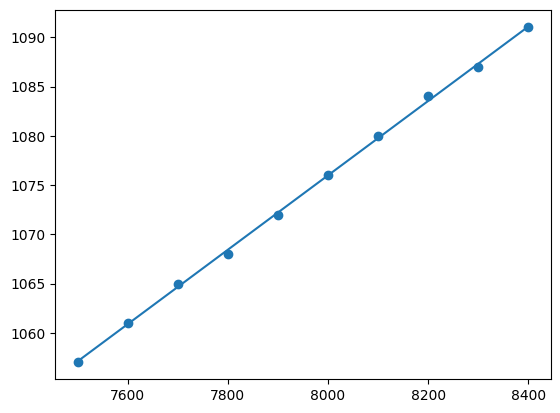

8.594242424242413 4146.872727272867
8.594242424242413x + 4146.872727272867 where x is the diameter of the impactor


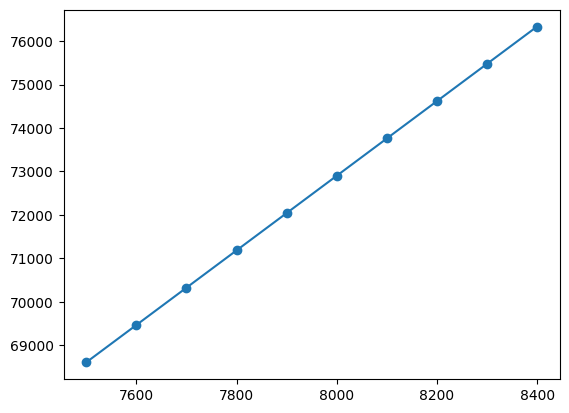

In [32]:

x = np.array([int(i) for i in pds])
y1 = []
y2 = []
for j in depths:
    y1.append(int(''.join((j[0], j[2:]))))
for d in dias:
    if len(d) > 5:
        y2.append(int(''.join((d[0:2], d[3:]))))
    else:
        y2.append(int(''.join((d[0:2], d[2:]))))
y1 = np.array(y1) # depth
y2 = np.array(y2) # diameters
print(x, y1, y2)
a, b = np.polyfit(x, y1, 1)
print(a,b)
print(f"{a}x + {b} where x is the diameter of the impactor")
plt.scatter(x,y1)
plt.plot(x, a*x+b)
plt.show()

a, b = np.polyfit(x, y2, 1)
print(a,b)
print(f"{a}x + {b} where x is the diameter of the impactor")
plt.scatter(x,y2)
plt.plot(x, a*x+b)
plt.show()

0.025999999999999992 503.3333333333334
0.025999999999999992x + 503.3333333333334 where x is the diameter of the impactor


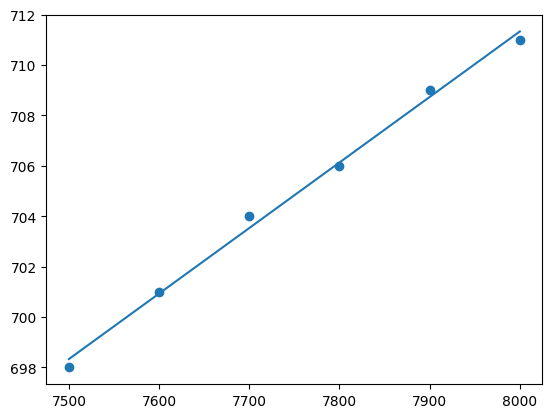

2.173999999999989 1030.3333333334324
2.173999999999989x + 1030.3333333334324 where x is the diameter of the impactor


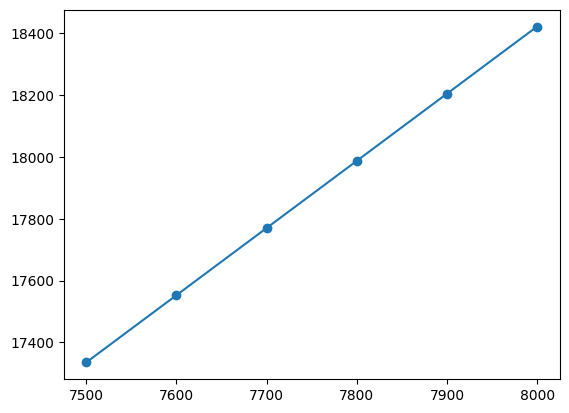

In [35]:
x = np.array([7500, 7600, 7700, 7800, 7900, 8000])
y1 = np.array([698, 701, 704, 706, 709, 711])
y2 = np.array([17335, 17553, 17770, 17988, 18205, 18422])
a, b = np.polyfit(x, y1, 1)
print(a,b)
print(f"{a}x + {b} where x is the diameter of the impactor")
plt.scatter(x,y1)
plt.plot(x, a*x+b)
plt.show()

a, b = np.polyfit(x, y2, 1)
print(a,b)
print(f"{a}x + {b} where x is the diameter of the impactor")
plt.scatter(x,y2)
plt.plot(x, a*x+b)
plt.show()

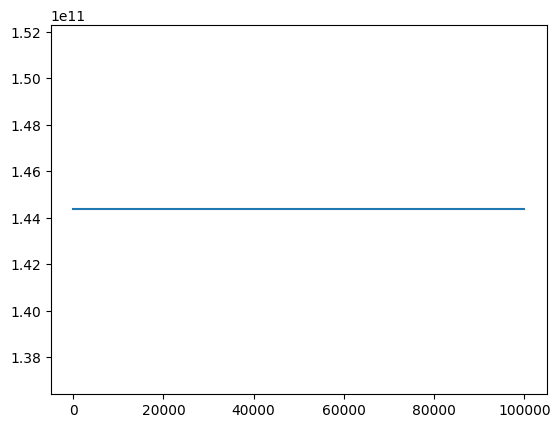

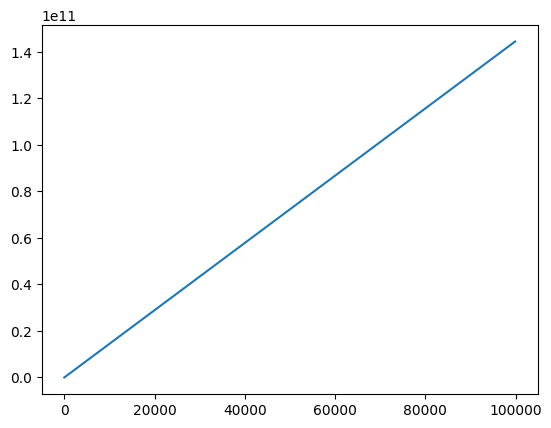

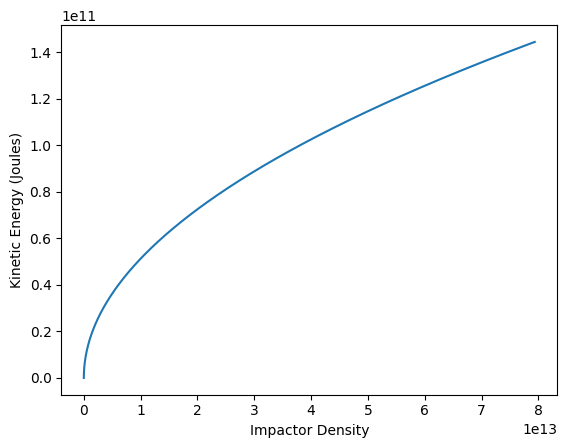

In [106]:
import math
import matplotlib.pyplot as plt
ms = []
ds = []
dens = []
v = 1700
ks = []
mass = 1000
# d if mass does not change
for d in range(1, 100000, 100):
    ds.append(d)
    ks.append(0.5*mass*(v**2))
plt.plot(ds, ks)
plt.show()
ks = []
# m as mass change
for mass in range(1, 100000, 100):
    ms.append(mass)
    ks.append(0.5*mass*(v**2))
plt.plot(ms, ks)
plt.show()
# dens as both change
for i in range(len(ms)):
    d = ds[i]
    dens.append(mass/math.pi*((d/2)**2))
plt.plot(dens,ks)
plt.xlabel("Impactor Density")
plt.ylabel("Kinetic Energy (Joules)")
plt.show()